In [1]:
import pandas as pd,warnings,numpy as np,matplotlib.pyplot as plt,seaborn as sns
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split,RandomizedSearchCV,GridSearchCV,cross_val_score
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,plot_confusion_matrix
from sklearn.datasets import load_boston,load_iris
from sklearn.tree import plot_tree
warnings.filterwarnings('ignore')

In [2]:
def Evaluate_Classifier(model,X_test,y_test):
    y_pred = model.predict(X_test)
    plot_confusion_matrix(model,X_test,y_test,display_labels=['NO','YES'],cmap=plt.cm.Blues)
    accuracy = accuracy_score(y_test,y_pred)
    print('Model Performance')
    print('Accuracy: {:.0%}'.format(accuracy))
    print(classification_report(y_pred,y_test))
    return accuracy

In [3]:
def Accuracy(model,X,y,name_accuracy):
    print('{}: {score:.2%}'.format(name_accuracy,score = model.score(X,y)))

# DATA

In [4]:
df = pd.read_csv(r"C:\Users\ADMIN\Documents\Data_Science\Data\Classified Data.csv")
df.drop(columns=df.columns[0],inplace=True)
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.3,random_state=10)

# PARAMETERS

In [5]:
boosting_type = ['gbdt','dart','goss','rf']
colsample_bytree = [0.3,0.4,0.5,0.7]
learning_rate = [0.05,0.10,0.15,0.20,0.25,0.30]
max_depth = [3,4,5,6,8,10,12,15]
min_child_weight = [1,3,5,7]
n_estimators = [100,150,200,250,500,1000]
num_leaves = 2*max_depth
min_data_in_leaf = [100,200,300,500,1000]
colsample_bytree = [0.3,0.4,0.5,0.7]
early_stopping_round = [1,2,3,4]
lightgbm_params = {
    'boosting_type':boosting_type,
    'colsample_bytree':colsample_bytree,
    'learning_rate':learning_rate,
    'max_depth':max_depth,
    'min_child_weight':min_child_weight,
    'n_estimators':n_estimators,
    'num_leaves':num_leaves,
    'min_data_in_leaf':min_data_in_leaf,
    'colsample_bytree':colsample_bytree,
    'early_stopping_round':early_stopping_round
}

# BASE MODEL

In [6]:
base_model = LGBMClassifier()
base_model.fit(X_train,y_train)

LGBMClassifier()

# RandomizedSearchCV

In [7]:
def Hypertuning_rscv(model,params,n_iter,cv,X_train,y_train):
    random = RandomizedSearchCV(estimator=model, param_distributions=params, n_jobs=-1, n_iter=n_iter, cv=cv,verbose=2, random_state=42)
    random.fit(X_train,y_train)
    best_params = random.best_params_
    best_score = random.best_score_
    best_estimator = random.best_estimator_
    return best_params,best_score,best_estimator

In [8]:
best_params, best_score, best_estimator_random = Hypertuning_rscv(LGBMClassifier(),lightgbm_params,200,10,X_train,y_train)

Fitting 10 folds for each of 200 candidates, totalling 2000 fits


# GridSearchCV

In [9]:
def Hypertuning_gscv(model,params,cv,X_train,y_train):
    grid = GridSearchCV(estimator = model, param_grid = params, cv=cv, n_jobs=-1, verbose=2)
    grid.fit(X_train,y_train)
    best_score = grid.best_score_
    best_params = grid.best_params_
    best_estimator = grid.best_estimator_
    return best_params,best_score,best_estimator

In [10]:
# best_params, best_score, best_estimator_grid = Hypertuning_gscv(LGBMClassifier(),lightgbm_params,3,X_train,y_train)

# Evaluation

In [11]:
Accuracy(base_model,X_train,y_train,'Train Accuracy Base Model')
Accuracy(base_model,X_test,y_test,'Test Accuracy Base Model')
print('')
Accuracy(best_estimator_random,X_train,y_train,'Train Accuracy Randomimzed')
Accuracy(best_estimator_random,X_test,y_test,'Test Accuracy Randomized')
# print('')
# Accuracy(best_estimator_grid,X_train,y_train,'Train Accuracy Grid')
# Accuracy(best_estimator_grid,X_test,y_test,'Test Accuracy Grid')

Train Accuracy Base Model: 100.00%
Test Accuracy Base Model: 93.67%

Train Accuracy Randomimzed: 91.57%
Test Accuracy Randomized: 91.00%


Model Performance
Accuracy: 94%
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       162
           1       0.95      0.91      0.93       138

    accuracy                           0.94       300
   macro avg       0.94      0.93      0.94       300
weighted avg       0.94      0.94      0.94       300



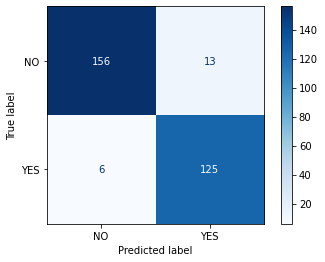

In [12]:
base_accuracy = Evaluate_Classifier(base_model,X_test,y_test)

Model Performance
Accuracy: 91%
              precision    recall  f1-score   support

           0       0.93      0.91      0.92       172
           1       0.89      0.91      0.90       128

    accuracy                           0.91       300
   macro avg       0.91      0.91      0.91       300
weighted avg       0.91      0.91      0.91       300



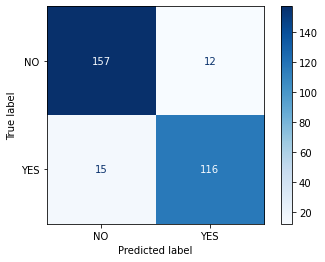

In [13]:
random_accuracy_classifier = Evaluate_Classifier(best_estimator_random,X_test,y_test)

In [14]:
print('Improvement of {:.2%}'.format((random_accuracy_classifier-base_accuracy)/base_accuracy))

Improvement of -2.85%


In [15]:
# grid_accuracy_classifier = Evaluate_Classifier(best_estimator_grid,X_test,y_test)

In [16]:
# print('Improvement of {:0.2%}'.format((grid_accuracy_classifier-base_accuracy)/base_accuracy))